In [1]:
!pip install pycaret --user
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sou

In [2]:
# Imports
from pycaret.regression import *
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
# Carregando os dados
dataset = pd.read_csv('/content/volkswagen.csv')
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [4]:
# Verificando a forma dos dados
dataset.shape

(15157, 9)

In [5]:
# Verificando as informações dos atributos
dataset.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [6]:
# Informações adicionais
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [7]:
# Verificando missing value
dataset.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [8]:
# Percentual de registro por modelo de carro
print(dataset['model'].value_counts()/len(dataset))

 Golf               0.320842
 Polo               0.216863
 Tiguan             0.116448
 Passat             0.060368
 Up                 0.058323
 T-Roc              0.048360
 Touareg            0.023949
 Touran             0.023224
 T-Cross            0.019793
 Golf SV            0.017682
 Sharan             0.017154
 Arteon             0.016362
 Scirocco           0.015966
 Amarok             0.007323
 Caravelle          0.006664
 CC                 0.006268
 Tiguan Allspace    0.006004
 Beetle             0.005476
 Shuttle            0.004025
 Caddy Maxi Life    0.003893
 Jetta              0.002111
 California         0.000990
 Caddy Life         0.000528
 Eos                0.000462
 Caddy              0.000396
 Caddy Maxi         0.000264
 Fox                0.000264
Name: model, dtype: float64


In [9]:
# Quantitativo de registro por tipo de combustivel
dataset['fuelType'].value_counts()

Petrol    8553
Diesel    6372
Hybrid     145
Other       87
Name: fuelType, dtype: int64

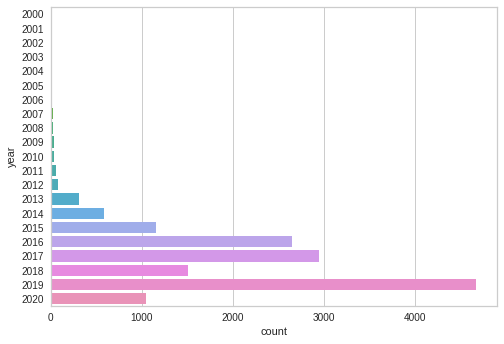

In [10]:
# Quantitativo de veículos por ano de fabricação
sns.countplot(y = dataset['year'])

In [11]:
# Separando os dados de validação
data = dataset.sample(frac=0.95 , random_state=786)

# Atribuindo os 5% restante para o dataframe de validação
data_validation = dataset.drop(data.index)

# Excluindo os demais registros
data.reset_index(inplace=True, drop=True)
data_validation.reset_index(inplace=True, drop=True)

# Dados utilizados para modelagem e validação
print('Dados para modelagem: ' + str(data.shape))
print('Dados reservados para a validação: ' + str(data_validation.shape))

Dados para modelagem: (14399, 9)
Dados reservados para a validação: (758, 9)


In [12]:
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [13]:
# Preparando o ambiente
exp_clf01 = setup(   data = data
                    ,experiment_name = "regressao01" 
                    ,target = 'price'
                    ,session_id = 123
                    ,profile = False
                    ,transform_target = True 
                    ,normalize = True
                    ,ignore_low_variance = True
                    ,combine_rare_levels = True
                    ,rare_level_threshold = 0.3
                    ,bin_numeric_features = ['tax']
                 )

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(14399, 9)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10079, 59)"


In [14]:
# Armazena o dataframe transformado
df_transformed = get_config('X_train')
df_transformed.head()

,mileage,mpg,engineSize,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caravelle,model_ Golf,model_ Golf SV,...,tax_13.0,tax_14.0,tax_2.0,tax_3.0,tax_4.0,tax_5.0,tax_6.0,tax_7.0,tax_8.0,tax_9.0
3933,0.573718,0.377724,0.874732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2124,1.388823,1.121089,0.005691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,-0.055714,-0.038560,-0.428830,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5927,-1.040123,-0.313605,0.005691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3488,-0.933170,-0.997500,-0.211570,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Comparando modelos
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1151.6678,3.104823e+06,1760.1138,0.9475,0.1035,0.0718,0.193
rf,Random Forest Regressor,1151.6992,3.183930e+06,1780.8467,0.9462,0.1100,0.0743,3.111
knn,K Neighbors Regressor,1200.4988,3.390189e+06,1838.6449,0.9427,0.1130,0.0780,0.222
et,Extra Trees Regressor,1163.0381,3.424253e+06,1841.3849,0.9421,0.1091,0.0736,2.758
gbr,Gradient Boosting Regressor,1518.2796,4.693053e+06,2165.7071,0.9205,0.1263,0.0955,1.197
br,Bayesian Ridge,1507.8615,5.046402e+06,2244.7874,0.9146,0.1207,0.0900,0.080
dt,Decision Tree Regressor,1420.1634,5.047460e+06,2242.7164,0.9146,0.1370,0.0911,0.090
ridge,Ridge Regression,1508.2690,5.069153e+06,2249.7676,0.9142,0.1206,0.0900,0.047
huber,Huber Regressor,1497.1841,5.416283e+06,2323.0229,0.9084,0.1216,0.0887,0.612
par,Passive Aggressive Regressor,1994.0262,8.201914e+06,2859.8478,0.8610,0.1665,0.1227,0.068


In [16]:
# Retorno da função
print(best_model)

PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=1...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                                        min_child_samples=20,
                                                        min_child_weigh

In [17]:
# Criando o modelo
model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1106.2273,2.842223e+06,1685.8895,0.9529,0.0958,0.0681
1,1180.4751,3.157255e+06,1776.8666,0.9453,0.1121,0.0727
2,1184.4392,3.336876e+06,1826.7118,0.9455,0.0926,0.0682
3,1166.8182,2.963068e+06,1721.3565,0.9536,0.1135,0.0772
4,1160.4837,2.987748e+06,1728.5104,0.9479,0.1228,0.0801
5,1127.2062,2.809895e+06,1676.2740,0.9478,0.1003,0.0711
6,1148.2029,3.405744e+06,1845.4658,0.9445,0.0969,0.0702
7,1153.6214,2.709822e+06,1646.1536,0.9516,0.0964,0.0699
8,1141.1421,3.118695e+06,1765.9827,0.9487,0.0971,0.0683


In [18]:
# Verificando o objeto criado
print(model)

PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=1...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                                        min_child_samples=20,
                                                        min_child_weigh

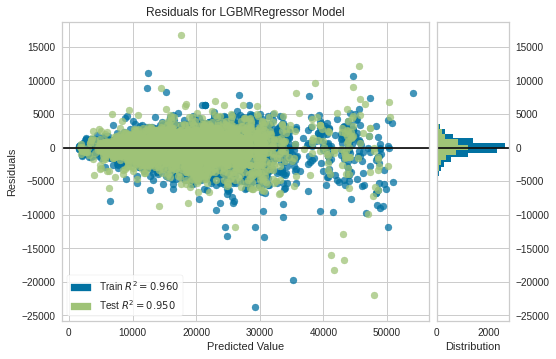

In [19]:
# Erro residuais 
plot_model(model)

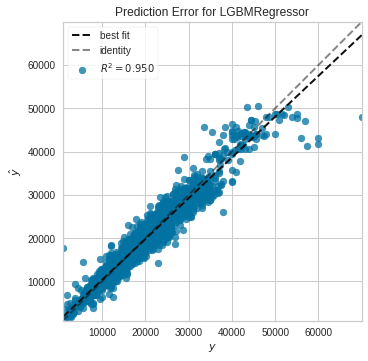

In [20]:
# Error
plot_model(model, plot = 'error')

In [21]:
# Selecionando o gráfico manualmente
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
# Predict utilizando a amostra de teste
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1159.8063,3.088368e+06,1757.3754,0.9497,0.1113,0.0762


,mileage,mpg,engineSize,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caravelle,model_ Golf,model_ Golf SV,...,tax_2.0,tax_3.0,tax_4.0,tax_5.0,tax_6.0,tax_7.0,tax_8.0,tax_9.0,price,Label
0,-0.118633,0.667636,0.874732,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17142,16449.298729
1,0.302206,0.771707,0.005691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15498,15164.415041
2,0.282893,0.377724,0.874732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17790,18134.103845
3,1.633194,-1.042102,0.874732,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17199,17765.019280
4,1.112092,0.199317,0.874732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15299,14836.972754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,-0.378757,0.377724,-1.297871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10595,11668.792577
4316,-0.791150,-0.722456,-1.297871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19490,19501.244631
4317,0.866677,0.466928,-0.863350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9995,10166.411106
4318,-0.521631,-0.558915,-0.428830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18240,19062.753452


In [23]:
# Predict utilizando os dados de validação
validation_predictions = predict_model(model, data=data_validation)
validation_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1125.3566,2.781164e+06,1667.6821,0.9573,0.0903,0.0668


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Label
0,T-Roc,2020,31895,Manual,10,Petrol,145,42.2,1.5,25583.612030
1,T-Roc,2019,33785,Semi-Auto,2500,Petrol,145,32.5,2.0,32385.994000
2,T-Roc,2019,22230,Manual,3392,Diesel,145,50.4,2.0,22297.758839
3,T-Roc,2019,25990,Semi-Auto,2423,Diesel,145,49.6,2.0,24613.876299
4,T-Roc,2020,27990,Manual,322,Diesel,145,50.4,2.0,25544.156430


In [24]:
# Verificando a performance do modelo aplicado aos dados de validação
from pycaret.utils import check_metric
check_metric(validation_predictions.price, validation_predictions.Label, 'R2')

0.9573

In [26]:
# Esta função treina o algoritimo e cria o modelo utilizando todo o conjunto de dados
final_model = finalize_model(model)
print(final_model)

PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=1...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                                        min_child_samples=20,
                                                        min_child_weigh

In [27]:
# Salvando o modelo em disco
save_model(final_model, 'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                          learning_rate=0.1,
                                                                          max_depth=-1,
                                                                          min_child_samples=20,
                                    